# House Price Prediction
Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
## Import packages and read data

In [130]:
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

%matplotlib inline
pd.options.mode.chained_assignment = None

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## EDA
Explore data to quickly check out the data that you will be working with. Realize more about data quality and features.

In [131]:
print(f'Rows: {len(train)}')
print(f'Features: {len(train.columns)}')

Rows: 1460
Features: 81


In [132]:
# show name, unique values, type, number of missing value and value samples of each col
for col in train.columns:
    uniques = train[col].unique()
    print('{0:20s} {1:5d} {2:8s} {3:5d} '.format(col, len(uniques), 
                                                 str(train[col].dtypes), 
                                                 train[col].isnull().sum()), uniques[:5])

Id                    1460 int64        0  [1 2 3 4 5]
MSSubClass              15 int64        0  [ 60  20  70  50 190]
MSZoning                 5 object       0  ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage            111 float64    259  [65. 80. 68. 60. 84.]
LotArea               1073 int64        0  [ 8450  9600 11250  9550 14260]
Street                   2 object       0  ['Pave' 'Grvl']
Alley                    3 object    1369  [nan 'Grvl' 'Pave']
LotShape                 4 object       0  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour              4 object       0  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities                2 object       0  ['AllPub' 'NoSeWa']
LotConfig                5 object       0  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope                3 object       0  ['Gtl' 'Mod' 'Sev']
Neighborhood            25 object       0  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel']
Condition1               9 object       0  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe']
Condition2      

Text(0.5, 1.0, 'Lot Area')

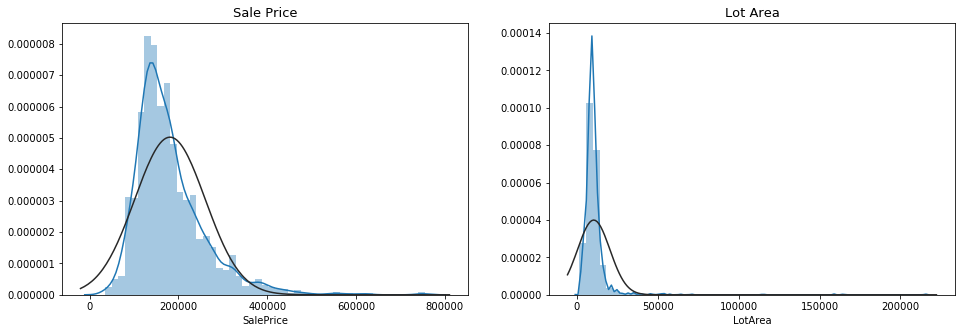

In [133]:
from scipy.stats import norm

# Plot the distribution with a histogram and maximum likelihood gaussian distribution fit
fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
sns.distplot(train["SalePrice"], fit = norm, ax=ax[0])  
ax[0].set_title('Sale Price', fontsize=13)

sns.distplot(train["LotArea"], fit = norm, ax=ax[1])  
ax[1].set_title('Lot Area', fontsize=13)

# distribution of these 2 variable do not follow the normal distribution

### Relation Exploration for Numerical Variables

Text(0.5, 1.0, 'MasVnrArea/SalePrice')

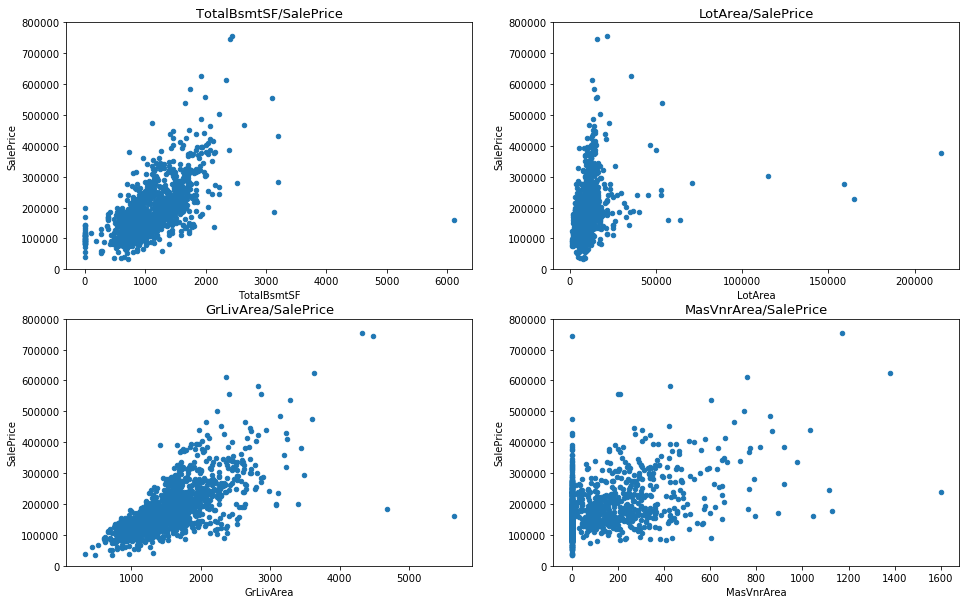

In [134]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

#scatter plot totalbsmtsf/saleprice
df_temp = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
df_temp.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000), ax=ax[0][0])
ax[0][0].set_title('TotalBsmtSF/SalePrice', fontsize=13)

#scatter plot lotarea/saleprice
df_temp = pd.concat([train['SalePrice'], train['LotArea']], axis=1)
df_temp.plot.scatter(x='LotArea', y='SalePrice', ylim=(0,800000), ax=ax[0][1])
ax[0][1].set_title('LotArea/SalePrice', fontsize=13)

#scatter plot grlivarea/saleprice
df_temp = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
df_temp.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000), ax=ax[1][0])
ax[1][0].set_title('GrLivArea/SalePrice', fontsize=13)

#scatter plot grlivarea/saleprice
df_temp = pd.concat([train['SalePrice'], train['MasVnrArea']], axis=1)
df_temp.plot.scatter(x='MasVnrArea', y='SalePrice', ylim=(0,800000), ax=ax[1][1])
ax[1][1].set_title('MasVnrArea/SalePrice', fontsize=13)

# there are outliars, then we need to remove them

### Relation Exploration for categorical features

Text(0.5, 1.0, 'Box Plot of OverallQual/SalePrice')

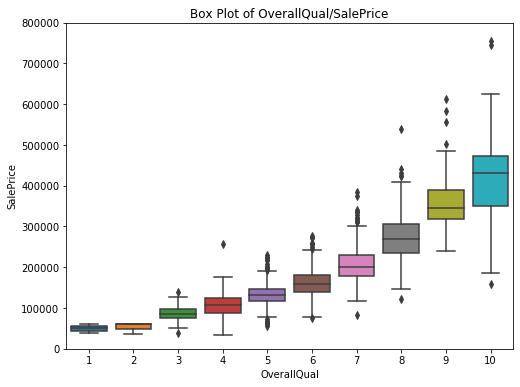

In [135]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=train['OverallQual'], y=train['SalePrice'])
fig.axis(ymin=0, ymax=800000);
fig.set_title('Box Plot of OverallQual/SalePrice')

# higher the OverallQual is, higher the SalePrice is

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

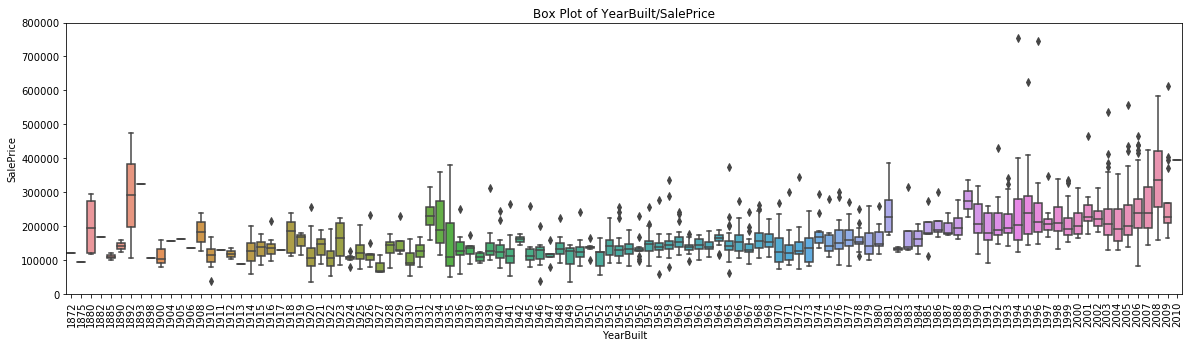

In [136]:
f, ax = plt.subplots(figsize=(20, 5))
fig = sns.boxplot(x=train['YearBuilt'], y=train['SalePrice'])
fig.axis(ymin=0, ymax=800000);
fig.set_title('Box Plot of YearBuilt/SalePrice')
plt.xticks(rotation=90)

# do not give us useful info

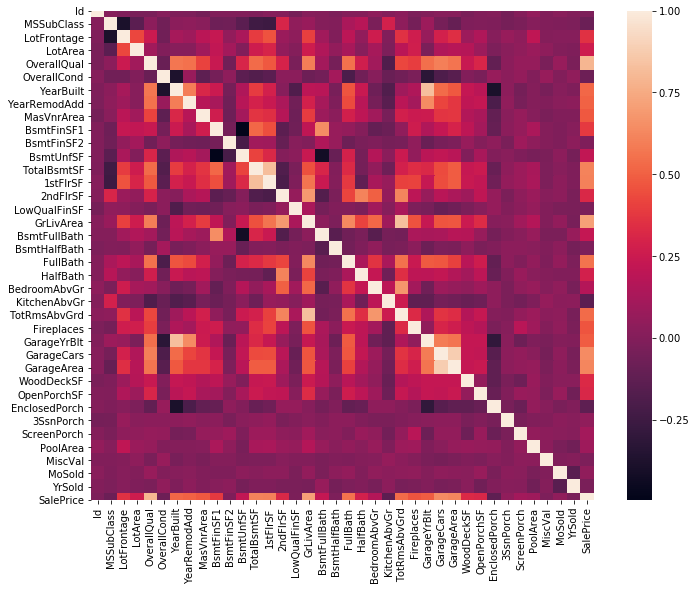

In [137]:
# Obeserve relationship between data and SalePrice  

plt.figure(figsize = (12,9))  
corrmat = train.corr()
sns.heatmap(corrmat, linecolor='black', square = True)  #Correlation matrix (heatmap style)

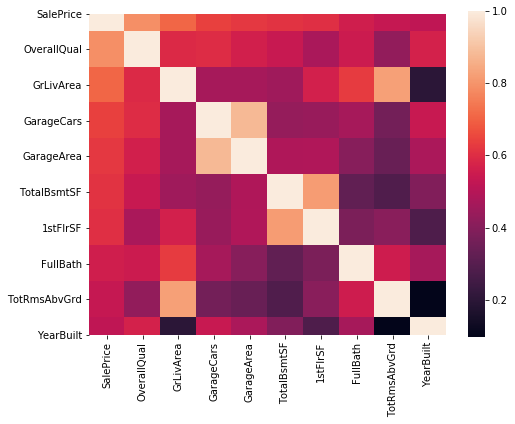

In [138]:
# show only top 10

plt.figure(figsize = (8, 6))  
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
corrmat = train[cols].corr()
sns.heatmap(corrmat, linecolor='black', square = True)  

## Data Cleasing

In [139]:
# drop useless columns & rows with too many null

total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [140]:
train = train.drop((missing_data[missing_data['Total'] > 1]).index, axis = 1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)

In [141]:
#drop outliers

train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)
train = train.drop(train[(train['OverallQual'] < 5) & (train['SalePrice'] > 200000)].index)

## Preparing for modelling

In [142]:
from sklearn.model_selection import train_test_split

test = test.drop((missing_data[missing_data['Total'] > 1]).index, axis = 1)
test.isnull().sum().sort_values(ascending = False)[:20]

MSZoning        4
BsmtHalfBath    2
BsmtFullBath    2
Functional      2
Utilities       2
Exterior2nd     1
KitchenQual     1
GarageCars      1
GarageArea      1
BsmtFinSF1      1
SaleType        1
TotalBsmtSF     1
BsmtUnfSF       1
BsmtFinSF2      1
Exterior1st     1
OverallCond     0
RoofMatl        0
ExterQual       0
RoofStyle       0
YearRemodAdd    0
dtype: int64

In [143]:
# fill missing data

for col in ('GarageArea', 'GarageCars'):
    test[col] = test[col].fillna(0)#Assuming that theres no Garage by using 0 

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    test[col] = test[col].fillna(0)#Assuming that theres no 
    
test['MSZoning'] = test['MSZoning'].fillna(train['MSZoning'].mode()[0])
test.drop('Utilities', inplace = True, axis = 1)
test['Functional'] = test['Functional'].fillna('Typ')

mode_col = ['Electrical','KitchenQual', 'Exterior1st', 'SaleType']

for col in mode_col:
    test[col] = test[col].fillna(train[col].mode()[0])
    
test["Exterior2nd"] = test["Exterior2nd"].fillna("None")

data = train.append(test, ignore_index = True)
data.set_index('Id',inplace = True)
data['1stFlrSF'] = data['1stFlrSF'].apply(lambda x : np.log(x))
data['GrLivArea'] = data['GrLivArea'].apply(lambda x : np.log(x))
data['SalePrice'] = data['SalePrice'].apply(lambda x : np.log(x))
data = pd.get_dummies(data)

dataTrain = data[pd.notnull(data['SalePrice'])].sort_values(by=["Id"])
dataTest = data[~pd.notnull(data['SalePrice'])].sort_values(by=["Id"])
dataTest = dataTest.drop('SalePrice', axis=1)

x_train, x_test, y_train, y_test = train_test_split(dataTrain.drop('SalePrice', axis=1), 
                                                    dataTrain['SalePrice'] , 
                                                    test_size=0.3,
                                                    random_state=42)

## Modelling

In [96]:
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

clf_R_random_grid =  {'alpha': [.001, .01, .1, 1],
                      'normalize': [True, False],
                      'fit_intercept': [True, False],
                      'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
                     }
clf_R_random = RandomizedSearchCV(estimator = Ridge(), param_distributions = clf_R_random_grid, 
                                  n_iter = 20, cv = 3, verbose=2, random_state=42)

clf_R_random.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END alpha=0.01, fit_intercept=True, normalize=False, solver=sag; total time=   0.4s
[CV] END alpha=0.01, fit_intercept=True, normalize=False, solver=sag; total time=   0.4s
[CV] END alpha=0.01, fit_intercept=True, normalize=False, solver=sag; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=True, normalize=False, solver=cholesky; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=True, normalize=False, solver=cholesky; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=True, normalize=False, solver=cholesky; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=True, normalize=True, solver=sparse_cg; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=True, normalize=True, solver=sparse_cg; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=True, normalize=True, solver=sparse_cg; total time=   0.0s
[CV] END alpha=0.01, fit_intercept=False, normalize=True, solver=sag; total time=   0.0s
[CV] END alpha=0.01

RandomizedSearchCV(cv=3, estimator=Ridge(), n_iter=20,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1],
                                        'fit_intercept': [True, False],
                                        'normalize': [True, False],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga']},
                   random_state=42, verbose=2)

In [97]:
clf_R_random.best_params_

{'solver': 'auto', 'normalize': False, 'fit_intercept': True, 'alpha': 1}

In [98]:
Ridge(solver='auto', normalize=False, fit_intercept=True, alpha=1).fit(x_train, y_train).score(x_test, y_test)

0.903672749334367

In [99]:
from sklearn.linear_model import Lasso

clf_L_random_grid =  {'alpha': [.001, .01, .1, 1],
                      'normalize': [True, False],
                      'fit_intercept': [True, False],
                      'selection': ['cyclic', 'random']
                     }
clf_L_random = RandomizedSearchCV(estimator = Lasso(), param_distributions = clf_L_random_grid, 
                                  n_iter = 20, cv = 3, verbose=2, random_state=42)

clf_L_random.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END alpha=1, fit_intercept=False, normalize=True, selection=random; total time=   0.0s
[CV] END alpha=1, fit_intercept=False, normalize=True, selection=random; total time=   0.0s
[CV] END alpha=1, fit_intercept=False, normalize=True, selection=random; total time=   0.0s
[CV] END alpha=0.01, fit_intercept=False, normalize=False, selection=random; total time=   0.0s
[CV] END alpha=0.01, fit_intercept=False, normalize=False, selection=random; total time=   0.0s
[CV] END alpha=0.01, fit_intercept=False, normalize=False, selection=random; total time=   0.0s
[CV] END alpha=1, fit_intercept=True, normalize=True, selection=cyclic; total time=   0.0s
[CV] END alpha=1, fit_intercept=True, normalize=True, selection=cyclic; total time=   0.0s
[CV] END alpha=1, fit_intercept=True, normalize=True, selection=cyclic; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=True, normalize=True, selection=random; total time=   0.0s
[CV] END 

RandomizedSearchCV(cv=3, estimator=Lasso(), n_iter=20,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1],
                                        'fit_intercept': [True, False],
                                        'normalize': [True, False],
                                        'selection': ['cyclic', 'random']},
                   random_state=42, verbose=2)

In [100]:
clf_L_random.best_params_

{'selection': 'random',
 'normalize': False,
 'fit_intercept': True,
 'alpha': 0.001}

In [104]:
Lasso(selection='random', normalize=False, fit_intercept=True, alpha=0.001).fit(x_train, y_train).score(x_test, y_test)

0.8959105622536742

In [106]:
from sklearn.ensemble import GradientBoostingRegressor

GBR_random_grid =  {'learning_rate': [.001, .01, .1, 1],
                    'loss': ['ls', 'lad', 'huber', 'quantile'],
                    'n_estimators': [100, 500, 1000],
                    'min_samples_split': [3, 5, 7],
                    'max_features' : ['auto', 'sqrt', 'log2']
                     }
GBR_random = RandomizedSearchCV(estimator = GradientBoostingRegressor(), param_distributions = GBR_random_grid, 
                                  n_iter = 20, cv = 3, verbose=2, random_state=42)

GBR_random.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END learning_rate=1, loss=quantile, max_features=log2, min_samples_split=3, n_estimators=500; total time=   0.8s
[CV] END learning_rate=1, loss=quantile, max_features=log2, min_samples_split=3, n_estimators=500; total time=   0.9s
[CV] END learning_rate=1, loss=quantile, max_features=log2, min_samples_split=3, n_estimators=500; total time=   0.9s
[CV] END learning_rate=0.001, loss=huber, max_features=log2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.001, loss=huber, max_features=log2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.001, loss=huber, max_features=log2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.01, loss=huber, max_features=log2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.01, loss=huber, max_features=log2, min_samples_split=3, n_estimators=100; total time=

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=20,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [3, 5, 7],
                                        'n_estimators': [100, 500, 1000]},
                   random_state=42, verbose=2)

In [107]:
GBR_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 3,
 'max_features': 'sqrt',
 'loss': 'huber',
 'learning_rate': 0.1}

In [109]:
GradientBoostingRegressor(loss = 'huber', n_estimators = 500, learning_rate = .1,  
                          max_features = 'sqrt', min_samples_split = 3).fit(x_train, y_train).score(x_test, y_test)

0.893661961122928

In [108]:
# Stacking models for better result

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

estimators = [
    ('clf_R', Ridge(solver='auto', normalize=False, fit_intercept=True, alpha=1)),
    ('clf_L', Lasso(selection='random', normalize=False, fit_intercept=True, alpha=0.001)),
    ('GBR', GradientBoostingRegressor(loss = 'huber', n_estimators = 500, learning_rate = .1,  
                                      max_features = 'sqrt', min_samples_split = 3))
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(),
    cv=5,
)

reg.fit(x_train, y_train).score(x_test, y_test)

0.8881166092232886

## Do prediction on test data

In [148]:
pred = reg.predict(dataTest)
submit = pd.read_csv('sample_submission.csv')
submit['SalePrice'] = pred 
submit['SalePrice'] = submit['SalePrice'].apply(lambda x : np.exp(x))
submit.to_csv('submit.csv', index = False)
print("Completed")

Completed
